 <font size=6> **实验12 深度学习计算**</font>

- 理解深度学习中的层与块，能够自定义块，掌握顺序块使用和在前向传播函数中执行代码；
- 掌握参数访问 、初始化和绑定的基本方法，理解延后初始化；
- 理解层定义 方法，掌握张量、参数保存与加载方法；
- 理解GPU在深度学习中的重要作用，掌握最基本使用方法。

**(实验报告提交题)** 在实验10、实验11中已要求对fetch_lfw_people数据集中选择的7位名人的脸部照片进行神经网络建模、改进。现要求，使用“块”(类)对程序进一步优化、封装，提高性能和可读性。

# 导入库

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from d2l import torch as d2l
from d2l_ex import train_ch3
import torch
from torchvision.transforms import ToTensor
from torch.utils.data import TensorDataset
from torch.utils import data
from torch import nn

# 数据处理

## 加载数据

In [3]:
train_data = []
train_labels = []
test_data = []
test_labels = []
SIZE = 50

for idx, pic_dir in enumerate(os.listdir('./pictures/')):
    train_path = os.path.join('./pictures', pic_dir, 'train')
    for filename in os.listdir(train_path):
        if filename.endswith('.jpg'):
            img = Image.open(os.path.join(train_path, filename)).convert('L')
            img = img.resize((SIZE, SIZE))  # 调整大小为 50x50
            img = ToTensor()(img)  # 转换为张量
            train_data.append(img)
            train_labels.append(idx)

    test_path = os.path.join('./pictures', pic_dir, 'test')
    for filename in os.listdir(test_path):
        if filename.endswith('.jpg'):
            img = Image.open(os.path.join(test_path, filename)).convert('L')
            img = img.resize((SIZE, SIZE))  # 调整大小为 50x50
            img = ToTensor()(img)  # 转换为张量
            test_data.append(img)
            test_labels.append(idx)

# 创建 TensorDataset，所有图像都为大小 50x50
lfw_train = TensorDataset(torch.stack(train_data), torch.tensor(train_labels))
lfw_test = TensorDataset(torch.stack(test_data), torch.tensor(test_labels))

## 数据查看



In [4]:
lfw_train[0][0].shape

torch.Size([1, 50, 50])

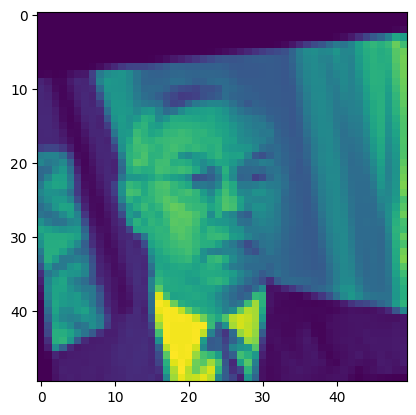

In [5]:
plt.imshow(lfw_train[48][0][0])

# 建模

## 定义一个MLP的类并实例化

In [14]:
class MLP(nn.Module):
    def __init__(self): 
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(SIZE * SIZE, 128), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(128, 64), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(64, 7)
        )
        
    def forward(self, X):
        return self.net(X)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

## 初始化模型参数

In [15]:
net = MLP()
net.apply(init_weights)

MLP(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2500, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.3, inplace=False)
    (7): Linear(in_features=64, out_features=7, bias=True)
  )
)

## 定义损失函数和优化算法

In [16]:
loss = nn.CrossEntropyLoss()
lr = 0.001
weight_decay = 1e-4
trainer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)

## 训练

epoch:80----train loss:0.006355785387789919; train acc:0.9434523809523809; test acc:0.75


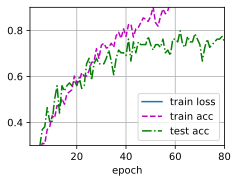

In [17]:
batch_size = 32
num_epochs = 80

train_iter = data.DataLoader(lfw_train, batch_size, shuffle=True)
test_iter = data.DataLoader(lfw_test, batch_size, shuffle=True)

train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 模型保存

In [18]:
torch.save(net.state_dict(), 'mlp.params')


## 加载模型并做预测

In [20]:
clone = MLP()
clone.load_state_dict(torch.load('mlp.params'))

C:\Users\Rossana Chan\AppData\Local\Temp\ipykernel_18424\3541161787.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  clone.load_state_dict(torch.load('mlp.params'))


<All keys matched successfully>

Junichiro_Koizumi_0001.jpg
Junichiro_Koizumi_0002.jpg
Junichiro_Koizumi_0003.jpg
Junichiro_Koizumi_0004.jpg
Junichiro_Koizumi_0005.jpg
Junichiro_Koizumi_0006.jpg
Junichiro_Koizumi_0007.jpg
Junichiro_Koizumi_0008.jpg
Junichiro_Koizumi_0009.jpg
Junichiro_Koizumi_0010.jpg
Junichiro_Koizumi_0011.jpg
Junichiro_Koizumi_0012.jpg
Junichiro_Koizumi_0013.jpg
Junichiro_Koizumi_0014.jpg
Junichiro_Koizumi_0015.jpg
Junichiro_Koizumi_0016.jpg
Junichiro_Koizumi_0017.jpg
Junichiro_Koizumi_0019.jpg
Junichiro_Koizumi_0021.jpg
Junichiro_Koizumi_0023.jpg
Junichiro_Koizumi_0024.jpg
Junichiro_Koizumi_0025.jpg
Junichiro_Koizumi_0026.jpg
Junichiro_Koizumi_0027.jpg
Junichiro_Koizumi_0029.jpg
Junichiro_Koizumi_0030.jpg
Junichiro_Koizumi_0031.jpg
Junichiro_Koizumi_0033.jpg
Junichiro_Koizumi_0034.jpg
Junichiro_Koizumi_0035.jpg
Junichiro_Koizumi_0036.jpg
Junichiro_Koizumi_0037.jpg
Junichiro_Koizumi_0039.jpg
Junichiro_Koizumi_0041.jpg
Junichiro_Koizumi_0042.jpg
Junichiro_Koizumi_0043.jpg
Junichiro_Koizumi_0044.jpg
J

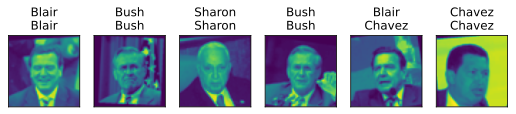

In [21]:
for idx, pic_dir in enumerate(os.listdir('./pictures/')):
    test_path = os.path.join('./pictures', pic_dir, 'test')
    for filename in os.listdir(train_path):
        print(filename)

def get_lfw_labels(labels):
    text_labels = ['Sharon', 'Pwell', 'Bush', 'Rumsfeld', 'Blair', 'Chavez', 'Koizumi']
    return [text_labels[int(i)] for i in labels]

def predict(net, test_iter, n=6):
    for X, y in test_iter:
        break
    trues = get_lfw_labels(y)
    preds = get_lfw_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 50, 50)), 1, n, titles=titles[0:n])

predict(net, test_iter)